In [7]:
import itertools
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.decomposition import PCA

DATA_PATH = './data/'


In [8]:
corpus = []
file_list = []

for i in range(1000):
    file_list.append('News_' + str(i + 1) + '_C.txt')

for file_name in file_list:
    file_path = DATA_PATH + file_name
    file = open(file_path, encoding='utf-8')
    corpus.append(file.read())

In [9]:
# 分词向量化
vectorizer = CountVectorizer()
word_vec = vectorizer.fit_transform(corpus)

In [10]:
#提取TF-IDF词向量
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(word_vec)
tfidf_matrix = tfidf.toarray()  #对应tfidf矩阵

In [11]:
#压缩 Feature
pca = PCA(n_components=2)
tfidf_matrix = pca.fit_transform(tfidf_matrix)

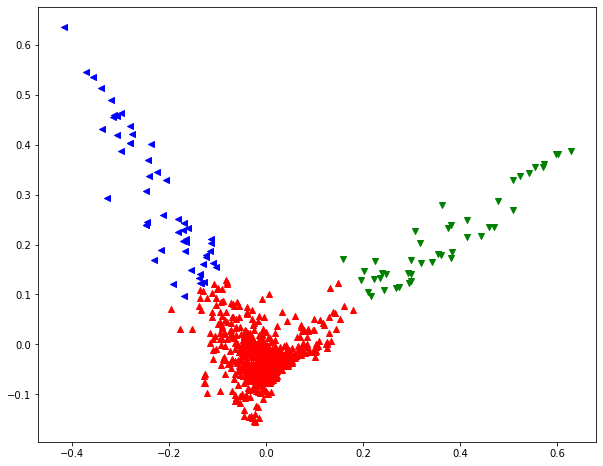

In [12]:
# K-Means

km_cluster = KMeans(n_clusters=3, max_iter=300, n_init=2,
                    init='random', verbose=False)

# 返回各自文本的所被分配到的类索引
labels = km_cluster.fit_predict(tfidf_matrix)

markers = ['^', 'v', '<', '>', 's', 'o']
colors = ['r', 'g', 'b', 'm', 'k', 'y']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(labels)):
    plt.scatter(tfidf_matrix[i, 0], tfidf_matrix[i, 1], c=colors[labels[i]], marker=markers[labels[i]])
fig.savefig('./kMeans.png', transparent=False, dpi=600, bbox_inches="tight")
